In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-9.402025482933283 -133.40783761984449
-7.768286937542683 47.88594354440272
-86.81155331974402 18.905851496204264
-53.67764337438578 -119.62926096009363
67.05763534905711 -103.97480242116929
47.80467369546801 66.20285921845019
10.235985259441264 -102.26201115948305
26.10584839694235 72.73144955557655
-86.85172333211398 172.86125839013363
42.55090540253727 177.79266633124928
16.676622596375353 -48.01169864414197
-11.502692838085053 76.21276937688947
16.257255332619735 -45.02782307986848
-65.57912398011192 -42.331930500905855
24.404611152525206 -105.14652260995005
-21.814761721307335 44.87414168795891
-51.182116371280166 -80.22294701039331
-13.512345753020071 -18.611221946232973
-77.85529186920797 -169.62836076527876
12.583906062808339 65.55022038634408
56.96224505730237 152.9927871538129
-18.49304409151283 -71.46147310706665
-50.443664659335695 130.83375533415324
-32.78395670967572 64.80669305787467
50.722691736998286 -126.09245664265464
-54.69429503034761 23.840859651643626
-23.4612734

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b5b0e3f3e1d6eb9b1041152ec4590cc1


In [7]:
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | ambilobe
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | zhezkazgan
Processing Record 7 of Set 1 | acapulco
Processing Record 8 of Set 1 | samdari
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | bathsheba
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | sinnamary
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | canatlan
Processing Record 16 of Set 1 | beroroha
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | ola
Processing Record 22 of Set 1 | ilo
Processing Record 23 of Set 1 | mount gambier
Pro

Processing Record 37 of Set 4 | asheboro
Processing Record 38 of Set 4 | bredy
Processing Record 39 of Set 4 | tahe
Processing Record 40 of Set 4 | maarianhamina
Processing Record 41 of Set 4 | tezu
Processing Record 42 of Set 4 | larsnes
Processing Record 43 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | kuching
Processing Record 46 of Set 4 | san carlos de bariloche
Processing Record 47 of Set 4 | aloleng
Processing Record 48 of Set 4 | ostersund
Processing Record 49 of Set 4 | sorrento
Processing Record 50 of Set 4 | bethel
Processing Record 1 of Set 5 | oktyabrskoye
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | payo
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | lagos
Processing Record 6 of Set 5 | zhangye
Processing Record 7 of Set 5 | kropotkin
Processing Record 8 of Set 5 | sola
Processing Record 9 of Set 5 | simoes
P

Processing Record 29 of Set 8 | pangnirtung
Processing Record 30 of Set 8 | kulevcha
Processing Record 31 of Set 8 | batticaloa
Processing Record 32 of Set 8 | vestmanna
Processing Record 33 of Set 8 | campobello di mazara
Processing Record 34 of Set 8 | bolshegrivskoye
City not found. Skipping...
Processing Record 35 of Set 8 | kudahuvadhoo
Processing Record 36 of Set 8 | manado
Processing Record 37 of Set 8 | rantepao
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | soyo
Processing Record 40 of Set 8 | shelburne
Processing Record 41 of Set 8 | bandar-e anzali
Processing Record 42 of Set 8 | tikhvin
Processing Record 43 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 8 | nowa ruda
Processing Record 45 of Set 8 | kavieng
Processing Record 46 of Set 8 | abashiri
Processing Record 47 of Set 8 | peleduy
Processing Record 48 of Set 8 | lodwar
Processing Record 49 of Set 8 | kamenolomni
Processing Record 50 of Set 8 | chokwe
Processing R

Processing Record 18 of Set 12 | sanming
Processing Record 19 of Set 12 | salekhard
Processing Record 20 of Set 12 | tigil
Processing Record 21 of Set 12 | jeremie
Processing Record 22 of Set 12 | nyurba
Processing Record 23 of Set 12 | atambua
Processing Record 24 of Set 12 | vestmannaeyjar
Processing Record 25 of Set 12 | abaete
Processing Record 26 of Set 12 | terney
Processing Record 27 of Set 12 | ouadda
Processing Record 28 of Set 12 | konakovo
Processing Record 29 of Set 12 | vysokogornyy
Processing Record 30 of Set 12 | poum
Processing Record 31 of Set 12 | chilliwack
Processing Record 32 of Set 12 | longyearbyen
Processing Record 33 of Set 12 | northam
Processing Record 34 of Set 12 | nagato
Processing Record 35 of Set 12 | lodeynoye pole
Processing Record 36 of Set 12 | winslow
Processing Record 37 of Set 12 | baykit
Processing Record 38 of Set 12 | samusu
City not found. Skipping...
Processing Record 39 of Set 12 | tiarei
Processing Record 40 of Set 12 | lukovetskiy
Processi

In [8]:
len(city_data)


566

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,75.78,75,6,11.34,PF,2022-10-16 12:52:40
1,Ambilobe,-13.2000,49.0500,82.09,50,45,5.91,MG,2022-10-16 12:52:40
2,Bredasdorp,-34.5322,20.0403,78.98,48,7,11.41,ZA,2022-10-16 12:52:40
3,Rikitea,-23.1203,-134.9692,68.52,71,100,22.93,PF,2022-10-16 12:52:41
4,Yellowknife,62.4560,-114.3525,27.12,86,100,20.00,CA,2022-10-16 12:50:59
5,Zhezkazgan,47.8043,67.7144,57.18,41,75,8.95,KZ,2022-10-16 12:52:41
6,Acapulco,16.8634,-99.8901,78.55,86,99,3.00,MX,2022-10-16 12:52:41
7,Samdari,25.8167,72.5833,88.66,19,1,0.67,IN,2022-10-16 12:52:42
8,Bluff,-46.6000,168.3333,51.04,68,52,23.29,NZ,2022-10-16 12:52:42
9,Nikolskoye,59.7035,30.7861,49.91,81,91,11.01,RU,2022-10-16 12:52:42


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-10-16 12:52:40,-9.8000,-139.0333,75.78,75,6,11.34
1,Ambilobe,MG,2022-10-16 12:52:40,-13.2000,49.0500,82.09,50,45,5.91
2,Bredasdorp,ZA,2022-10-16 12:52:40,-34.5322,20.0403,78.98,48,7,11.41
3,Rikitea,PF,2022-10-16 12:52:41,-23.1203,-134.9692,68.52,71,100,22.93
4,Yellowknife,CA,2022-10-16 12:50:59,62.4560,-114.3525,27.12,86,100,20.00
5,Zhezkazgan,KZ,2022-10-16 12:52:41,47.8043,67.7144,57.18,41,75,8.95
6,Acapulco,MX,2022-10-16 12:52:41,16.8634,-99.8901,78.55,86,99,3.00
7,Samdari,IN,2022-10-16 12:52:42,25.8167,72.5833,88.66,19,1,0.67
8,Bluff,NZ,2022-10-16 12:52:42,-46.6000,168.3333,51.04,68,52,23.29
9,Nikolskoye,RU,2022-10-16 12:52:42,59.7035,30.7861,49.91,81,91,11.01


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1665925738.5139866

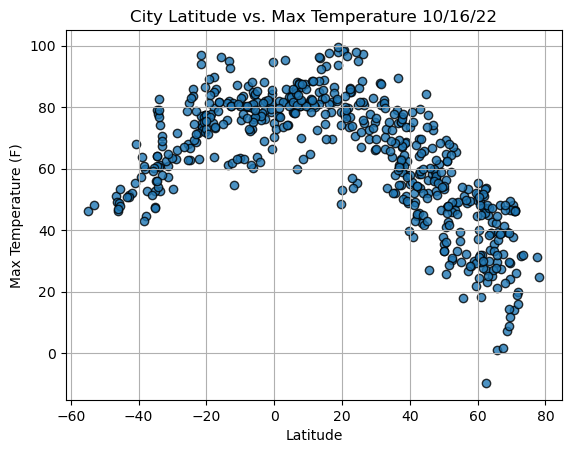

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


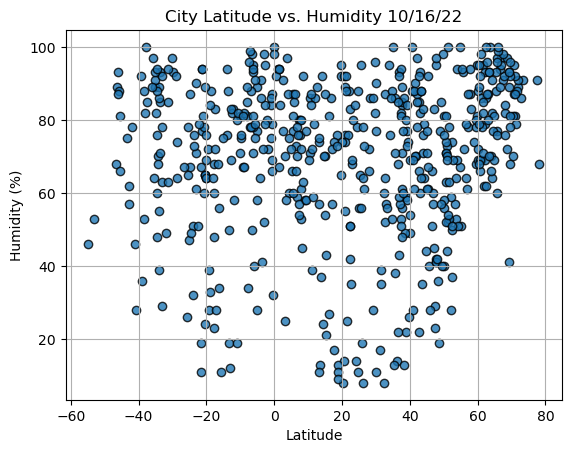

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

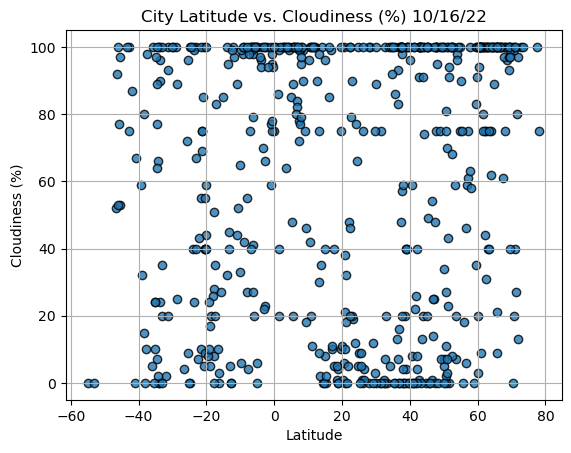

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

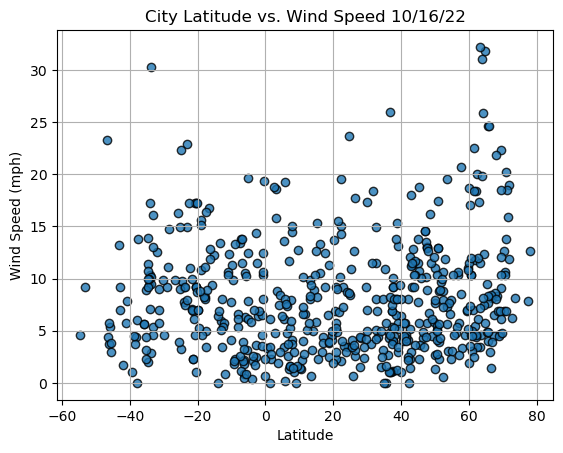

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-10-16 12:51:36
Lat                         -54.8
Lng                         -68.3
Max Temp                    46.06
Humidity                       46
Cloudiness                      0
Wind Speed                   4.61
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Yellowknife,CA,2022-10-16 12:50:59,62.4560,-114.3525,27.12,86,100,20.00
5,Zhezkazgan,KZ,2022-10-16 12:52:41,47.8043,67.7144,57.18,41,75,8.95
6,Acapulco,MX,2022-10-16 12:52:41,16.8634,-99.8901,78.55,86,99,3.00
7,Samdari,IN,2022-10-16 12:52:42,25.8167,72.5833,88.66,19,1,0.67
9,Nikolskoye,RU,2022-10-16 12:52:42,59.7035,30.7861,49.91,81,91,11.01
...,...,...,...,...,...,...,...,...,...
559,Ketchikan,US,2022-10-16 13:07:54,55.3422,-131.6461,54.07,94,75,10.36
560,Abay,KZ,2022-10-16 13:07:55,49.6311,72.8539,53.98,40,100,12.03
561,Colares,PT,2022-10-16 13:07:55,38.7992,-9.4469,73.45,80,40,8.05
563,Shaoxing,CN,2022-10-16 13:07:56,30.0110,120.5715,69.75,77,89,4.97


In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Yellowknife,CA,2022-10-16 12:50:59,62.4560,-114.3525,27.12,86,100,20.00
5,Zhezkazgan,KZ,2022-10-16 12:52:41,47.8043,67.7144,57.18,41,75,8.95
6,Acapulco,MX,2022-10-16 12:52:41,16.8634,-99.8901,78.55,86,99,3.00
7,Samdari,IN,2022-10-16 12:52:42,25.8167,72.5833,88.66,19,1,0.67
9,Nikolskoye,RU,2022-10-16 12:52:42,59.7035,30.7861,49.91,81,91,11.01


In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
561     True
562    False
563     True
564    False
565     True
Name: Lat, Length: 566, dtype: bool

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

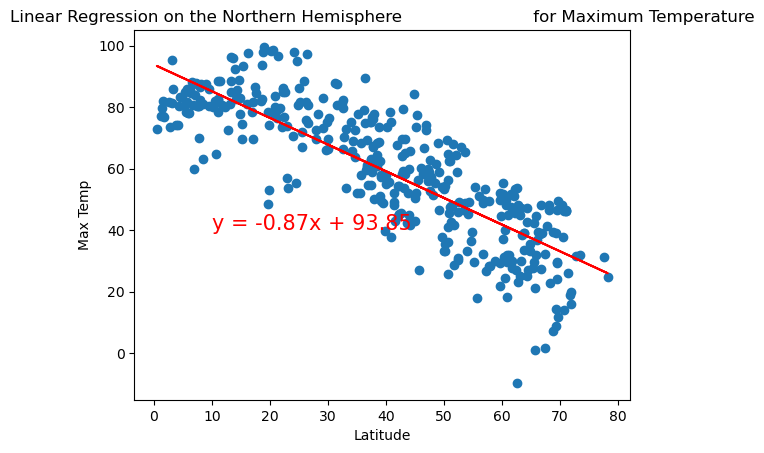

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

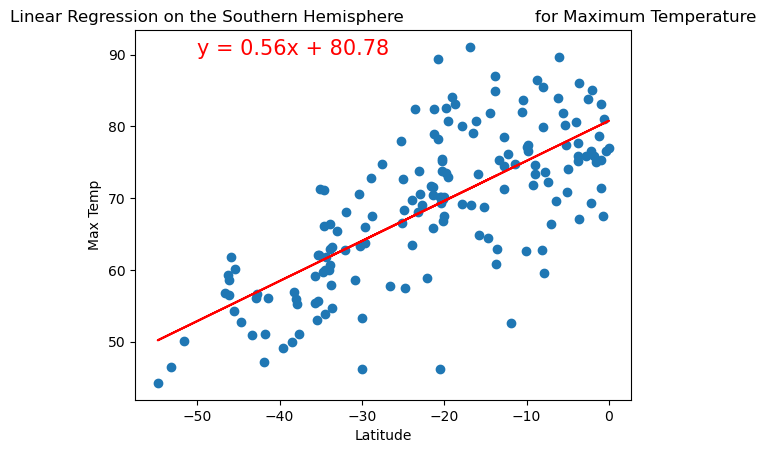

In [49]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
FINDINGS: 
    The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is 
    less than –0.9 for the Northern Hemisphere and greater than 0.5 for the Southern Hemisphere, as shown by the plots 
    here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further 
    from the equator the temperatures become cooler. 

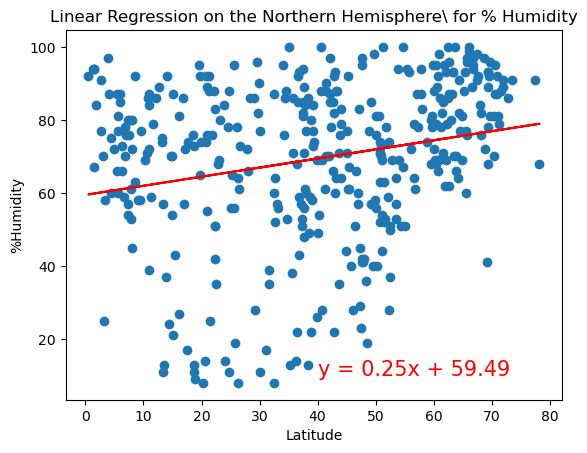

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\ for % Humidity', '%Humidity',(40,10))

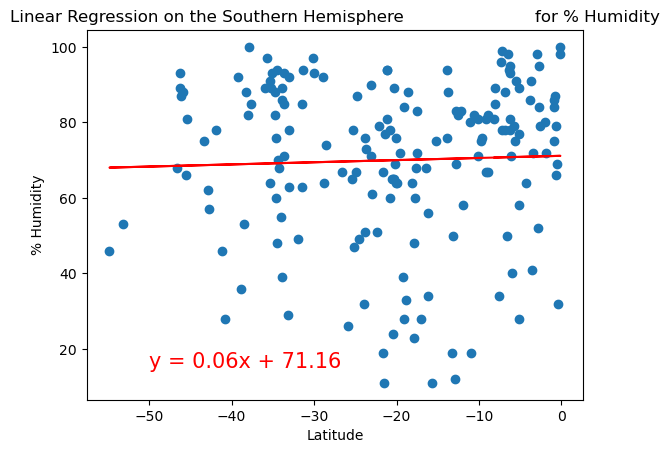

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
FINDINGS 
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.25 for 
the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable 
due to changing weather patterns that can increase or decrease percent humidity. 

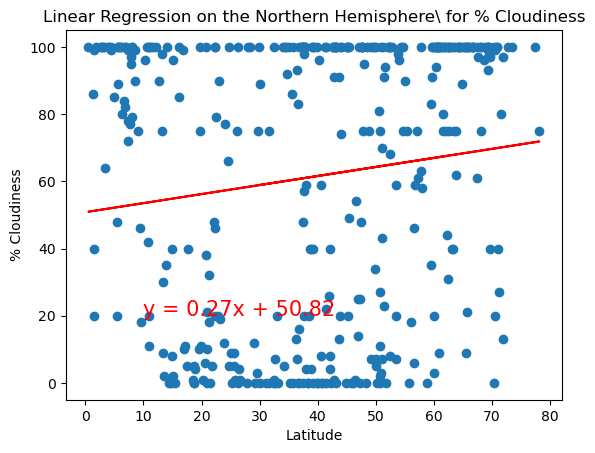

In [46]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\ for % Cloudiness', '% Cloudiness',(10,20))

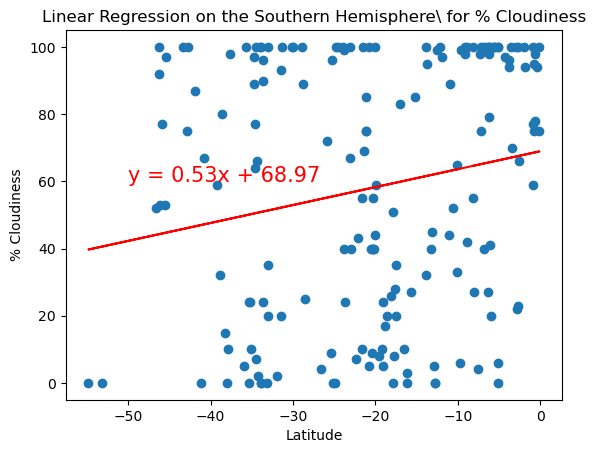

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\ for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
FINDINGS:
    The correlation between the latitude and percent cloudiness is low because the r-value is 0.27 for 
    the Northern Hemisphere and 0.53 for the Southern Hemisphere for the plots shown here. This means that cloudiness 
    is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

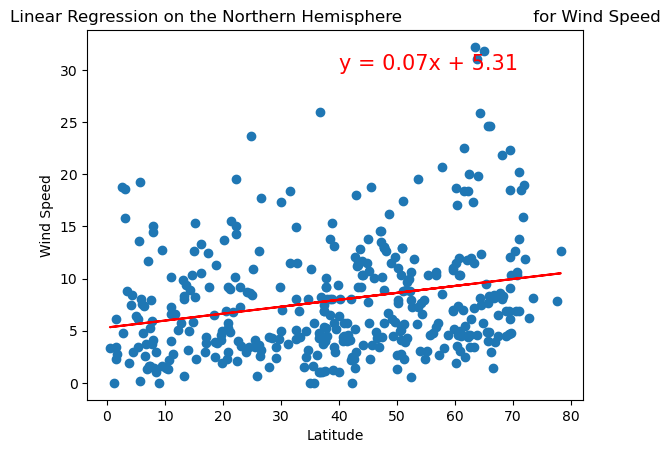

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

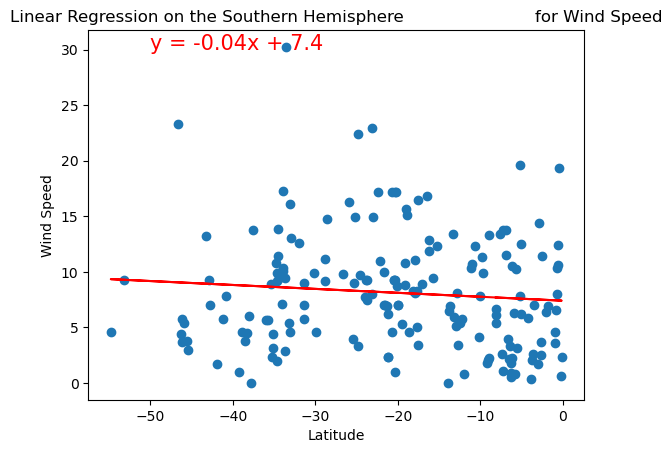

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))

In [ ]:
FINDINGS:
    The correlation between the latitude and wind speed is very low because the r-value is 0.07 for the Northern 
    Hemisphere and less than –0.04 for the Southern Hemisphere for the plots shown here. This means that 
    wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.